генеруємо датасет

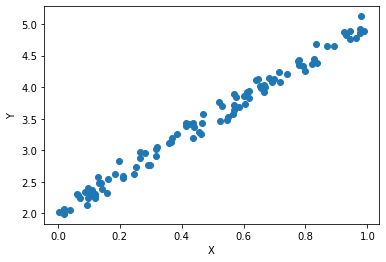

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(0)
X = np.random.rand(100, 1)  # Input features
y = 3 * X + 2 + 0.1 * np.random.randn(100, 1) 

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

def checkModel(model, learningRate=0.001, epochs_size=200):
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learningRate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    model.fit(X, y, epochs=epochs_size, verbose=0)  

    y_pred = model.predict(X)

    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)

    print(f'Final Mean Squared Error (MSE): {loss:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'R-squared (R2): {r2:.4f}')
    


Спробуйте побудувати нейронну мережу з трьома повнозв'язними шарами (Dense layers) та навчити її на вашому власному наборі даних для регресії (200 епох). Оцініть її ефективність.

In [8]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  
])

checkModel(model=model)

4/4 [==============================] - 0s 2ms/step
Final Mean Squared Error (MSE): 0.0101
Mean Absolute Error (MAE): 0.0849
Root Mean Squared Error (RMSE): 0.0996
R-squared (R2): 0.9869


Побудова більшої моделі (як поводиться модель з чотирма повнозв'язними шарами?).

In [9]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'), 
    layers.Dense(1)  
])

checkModel(model=model)

4/4 [==============================] - 0s 2ms/step
Final Mean Squared Error (MSE): 0.0101
Mean Absolute Error (MAE): 0.0855
Root Mean Squared Error (RMSE): 0.1019
R-squared (R2): 0.9862


Збільшення кількості нейронів у кожному шарі.

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(1) 
])

checkModel(model);

Ознайомтеся з документацією Adam та з'ясуйте, що являє собою перший параметр. Які зміни відбудуться, якщо збільшити його в 10 разів?

Швидкість навчання (learning rate) - це гіперпараметр, який визначає крок, на який змінюються ваги нейронної мережі під час процесу навчання.

In [13]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(1) 
])

checkModel(model, learningRate=0.01)

4/4 [==============================] - 0s 2ms/step
Final Mean Squared Error (MSE): 0.0101
Mean Absolute Error (MAE): 0.0931
Root Mean Squared Error (RMSE): 0.1123
R-squared (R2): 0.9833


Які будуть результати, якщо тренування проводити довше (наприклад, 300 епох замість 200)?

In [15]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(1) 
])

checkModel(model, learningRate=0.01, epochs_size=300)

4/4 [==============================] - 0s 2ms/step
Final Mean Squared Error (MSE): 0.0101
Mean Absolute Error (MAE): 0.0866
Root Mean Squared Error (RMSE): 0.1038
R-squared (R2): 0.9857


Знайдіть відповідний код та побудуйте графік зміни функції втрат на тренувальному та тестувальному наборі даних під час тренування останньої моделі.

In [18]:
train_loss_history = []
val_loss_history = []

for epoch in range(300):
    history = model.fit(X, y, epochs=1, verbose=0)
    train_loss_history.append(history.history['loss'][0])

    val_loss = model.evaluate(X, y, verbose=0)
    val_loss_history.append(val_loss)

plt.plot(range(1, 301), train_loss_history, label='Training Loss')
plt.plot(range(1, 301), val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()